Digital Business University of Applied Sciences

Data Science und Management (M. Sc.)

MALE01 Machine Learning

Prof. Dr. Daniel Ambach

Julia Schmid (200022)

***
# Vergleich von Methoden zur Behebung unausgeglichener Datensätze in Machine Learning Klassifikationsmodellen am Beispiel eines Datensatzes zur Zahlungsausfallvorhersage
***

In diesem Jupyter-Notebook werden verschiedene Methoden zur Behebung von unausgeglichenen Datensätze auf die Machine Learning (ML) Klassifikationsmodellen Random Forest, Logistische Regression und XGBoost angewendet, evaluiert und miteinander verglichen. 

In [288]:
# Importe
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.metrics import balanced_accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


from ydata_profiling import ProfileReport
import webbrowser


## **Daten verstehen** 

### Daten einlesen

Quelle: Fusion, C., & Cukiersk, W. Give Me Some Credit. Abgerufen am 14.04.2025 von https://www.kaggle.com/c/GiveMeSomeCredit/data?select=cs-training.csv

In [322]:
input_file_name = "cs-training.csv"
df = pd.read_csv(input_file_name, encoding='latin1', index_col=0)

### Daten beschreiben

In [323]:
# Ausgabe der ersten 5 Zeilen
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [291]:
# Ausgabe der Anzahl der Zeilen und Spalten
print(f'Anzahl Zeilen: {df.shape[0]}')
print(f'Anzahl Spalten: {df.shape[1]}')

Anzahl Zeilen: 150000
Anzahl Spalten: 12


In [292]:
# Ausgabe der Datensatz-Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [293]:
# Ausgabe der statistischen Kennzahlen der numerischen Variablen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


### Daten visualisieren

In [294]:
# Erstellung eines Profilingreports
pr = ProfileReport(df, title = 'Credit Data') 
filename_pr = "credit_data_pr.html" 
path_pr = os.path.abspath(filename_pr) 

pr.to_file(path_pr)  # ProfileReport als HTML speichern
webbrowser.open(f"file://{path_pr}")  # ProfileReport im Browser öffnen

## **Datenaufbereitung**

### Duplikate

In [295]:
# Bestimmung der Anzahl der Duplikate
print('Dieser Datensatz besitz ' + str(df.duplicated().sum()) + ' Duplikate.')

Dieser Datensatz besitz 0 Duplikate.


### NaNs

In [296]:
# Bestimmung der Variablen mit Nan-Werte inklusive der Anzahl der NaN-Einträge
df.isnull().sum()[df.isnull().sum() > 0]

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

In [297]:
# Zeilen mit NaN-Werten werden gelöscht
df = df.dropna(subset=['MonthlyIncome'])
df = df.dropna(subset=['NumberOfDependents'])

## **Machine Learning Modellierung** 

### Funktionen für das Training und der Evaluierung der ML-Modelle

In [300]:
# Ergebnistabelle initialisieren (für die Speicherung der Evaluationskennzahlen)
df_result = pd.DataFrame(columns=['model','method', 'balancedAccuracy', 'precision', 'recall', 'f1', 'rocAuc'])

'''
Funktion:       Training auf den Trainingsdaten und Vorhersage der Zielvariable auf den Testdaten für das übergebene Modell.
Input:          ml_model (ausgewähltes zu trainierenden Modell), 
                X_train (Label der Trainingsdaten), 
                y_train (Feature der Trainingsdaten), 
                X_test (Label der Testdaten), 
                name (Name des zu trainierenden Modells), 
                algoAdaption (Variable, welche angibt, ob eine Klassen-Gewichtung bestimmt werden soll)
Output:         y_pred_model (vom Modell vorhergesagte Zielvariable)
Funktionsweise: Das übergebende Modell wird auf den Trainingsdaten trainiert und eine Vorhersage für die Testdaten getroffen. '
'''
def runModel(ml_model, X_train, y_train, X_test, name, algoAdaption = False):
    name_print_out = name
    print('[INFO] Model ' + name_print_out + ' started.') # Info-Meldung: Modelltraining Start

    # Modell-Name
    name = name.split()[0]
    name = name.replace(" ", "")

    sampleWeights = compute_sample_weight(class_weight='balanced', y=y_train) if algoAdaption else None # Gewichtigung für das Training
    ml_model.fit(X_train, y_train, sample_weight = sampleWeights) # Modell Training mit Trainings-daten 
    
    y_pred_model = ml_model.predict(X_test) # Für die Testdaten wird eine Vorhersage basierend auf dem trainierten Modell getroffen 

    print('[INFO] Model ' + name_print_out + ' finished.') # Info-Meldung: Modelltraining Ende

    return(y_pred_model)

'''           
Funktion:       Bestimmung der Evaluationskenntzahlen für das übergebende Modell 
Input:          y_pred_model (vorhergesagte Zielvariable), 
                y_test (tatsächlicher Zielvariable), 
                name (Name des trainierte Modell), 
                df_result (Ergebnistabelle), 
                method (Methode zur Behebung unausgeglichener Daten)
Output:         df_result (angepasste Ergebnistabelle), 
                (fpr, tpr, rocAuc) (ROC-Daten)
Funktionsweise: Mithilfe der vorhergesagten und der tatsächlichen Zielvariablen wird die Balanced Accuracy, Precision, Recall, F1, ROC-AUC, FPR und TPR ermittelt. 
                Die Kennzahlen werden in der Ergebistabelle mit dem Modellname und der Methodenname gespeichert.
'''
def getResults(y_pred_model, y_test, name, df_result, method):
    # Bestimmung der Evaluationskennzahlen
    balancedAccuracy = balanced_accuracy_score(y_test, y_pred_model)
    precision = precision_score(y_test, y_pred_model)
    recall = recall_score(y_test, y_pred_model)
    f1 = f1_score(y_test, y_pred_model)
    rocAuc = roc_auc_score(y_test, y_pred_model)
    fpr, tpr, _ = roc_curve(y_test, y_pred_model)
    rocAuc = auc(fpr, tpr)

    # Speicherung der Evaluationskennzahlen 
    temp = pd.DataFrame([[name.split()[0], method, balancedAccuracy, precision, recall, f1,rocAuc ]], columns=['model','method','balancedAccuracy', 'precision', 'recall', 'f1', 'rocAuc'])
    df_result = pd.concat([df_result, temp], ignore_index=True)

    return df_result, (fpr, tpr, rocAuc)

'''
Funktion:       Definierung der ML-Modelle inkl. Methode-Besonderheiten sowie Training und Evaluierung der Modelle
Input:          X_train (Label der Trainingsdaten), 
                y_train (Feature der Trainingsdaten), 
                X_test (Label der Testdaten), 
                y_test (tatsächlicher Zielvariable), 
                df_result (Ergebnistabelle), 
                method (Methode zur Behebung unausgeglichener Daten), 
                balanced (Gewicht-Parameter-Wert), 
                algo (Boolean-Wert der angibt, ob es sich um die Anpassung der Parameter Methode handelt)
Output:         df_result (angepasste Ergebnistabelle), 
                roc_data_dict (ROC-Daten)
Funktionsweise: Abhängig von der Anpassung der Parameter Methode wird das Klassenverhätlnis für das XGBoost-Modell bestimmt. 
                Anschließend werden die Modelle mit ihren Methode-Besonderheiten definiert. Jedes Modell wird trainiert, getestet und evaluiert.
'''
def runAndPredict(X_train, y_train, X_test, y_test, df_result, method, balanced = None, algo = False):
    # Bei der Methode der Anpassung der Parameter wird das Verhältnis der beiden Zielvariablenklassen (0,1) bestimmt. 
    # Bei allen anderen Methoden wird keine Verhältnis bestimmt und auf 1 gesetzt.
    ratio = 1 if algo == False else (sum(y_train == 0) / sum(y_train == 1))

    # Definierung der drei ML-Grundmodelle
    rf_model = RandomForestClassifier(random_state=123, class_weight = balanced)
    xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric = 'auc', random_state=123, n_estimators=500, learning_rate=0.2, scale_pos_weight=ratio )
    logReg_model = LogisticRegression(class_weight=balanced)

    # Zuordnung zwischen Modell-Name (mit Methoden-Besonderheit) und Modell
    ml_model = {
        f'RF {method}': rf_model,
        f'XGBoost {method}': xgb_model,
        f'LR {method}': logReg_model
    }
    
    roc_data_dict = {}

    # Jedes Model wird trainiert und evaluiert
    for modelName, model in ml_model.items():
        y_pred = runModel(model, X_train, y_train, X_test, modelName) # Training und Vorhersage der Zievariable auf Testdaten
        df_result, roc_data = getResults(y_pred, y_test, modelName, df_result, method) # Evaluierung 
        roc_data_dict[modelName] = roc_data # Speicherung der ROC-Daten

    return df_result, roc_data_dict

### Daten in Test- und Trainingsdaten teilen

In [301]:
# Ausgabe der Verteilung der Zielvariable SeriousDlqin2yrs
count_label = df['SeriousDlqin2yrs'].value_counts()
count_label

SeriousDlqin2yrs
0    111912
1      8357
Name: count, dtype: int64

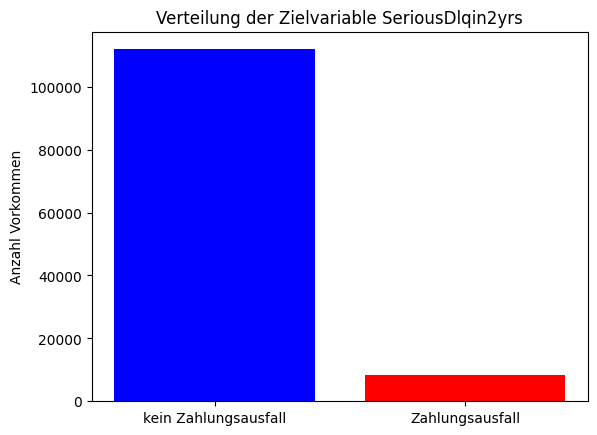

In [302]:
# Grafik: Verteilung der Zielvariable SeriousDlqin2yrs
plt.bar(count_label.index, count_label.values, color=['blue', 'red'])
plt.xlabel('')
plt.ylabel('Anzahl Vorkommen')
plt.title('Verteilung der Zielvariable SeriousDlqin2yrs')
plt.xticks(count_label.index)
plt.xticks(ticks=[0, 1], labels=["kein Zahlungsausfall", "Zahlungsausfall"])
plt.show()

In [303]:
# Daten im Verhätlnis 80%-20% (Training-Test) aufteilen
y = df['SeriousDlqin2yrs']
X = df.loc[:,df.columns != 'SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [304]:
# Skalierung 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Erster Durchlauf
Modelle ohne Anpassungen

In [305]:
# Anwendung der Funktion runAndPredict ohne Anpassungenm 
df_result, roc_data = runAndPredict(X_train_scaled, y_train, X_test_scaled, y_test, df_result, 'Normal' )

[INFO] Model RF Normal started.
[INFO] Model RF Normal finished.
[INFO] Model XGBoost Normal started.


/var/folders/jf/k1y_jzxs5177jm_fgv__dnww0000gn/T/ipykernel_72983/3982761648.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_result = pd.concat([df_result, temp], ignore_index=True)


[INFO] Model XGBoost Normal finished.
[INFO] Model LR Normal started.
[INFO] Model LR Normal finished.


### Anpassung der Hyperparameter
Modelle mit angepassten Gewicht-Parameter

In [306]:
# Anwendung der Funktion runAndPredict mit angepassten Hyperparameter 
df_result, roc_data_algo = runAndPredict(X_train_scaled, y_train, X_test_scaled, y_test, df_result, 'Algo', balanced = "balanced",algo = True )

[INFO] Model RF Algo started.
[INFO] Model RF Algo finished.
[INFO] Model XGBoost Algo started.
[INFO] Model XGBoost Algo finished.
[INFO] Model LR Algo started.
[INFO] Model LR Algo finished.


### Undersampling

In [307]:
# Undersampling durchführen
print('Ursprüngliche Klassenvertilung %s' % Counter(y))

rus = RandomUnderSampler(random_state=123)
X_us, y_us = rus.fit_resample(X, y)

print('Neue Klassenverteilung mit Undersampling:', Counter(y_us))
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size = 0.2, random_state = 123)

Ursprüngliche Klassenvertilung Counter({0: 111912, 1: 8357})
Neue Klassenverteilung mit Undersampling: Counter({0: 8357, 1: 8357})


In [308]:
# Skalierung 
scaler = StandardScaler()
X_train_us_scaled = scaler.fit_transform(X_train_us)
X_test_us_scaled = scaler.transform(X_test_us)

In [309]:
# Anwendung der Funktion runAndPredict mit Undersampling
df_result, roc_data_us = runAndPredict(X_train_us_scaled, y_train_us, X_test_us_scaled, y_test_us, df_result, 'US')

[INFO] Model RF US started.
[INFO] Model RF US finished.
[INFO] Model XGBoost US started.
[INFO] Model XGBoost US finished.
[INFO] Model LR US started.
[INFO] Model LR US finished.


### Oversampling

In [310]:
# Oversampling durchführen 
print('Ursprüngliche Klassenvertilung %s' % Counter(y))

ros = RandomOverSampler(sampling_strategy='minority')
X_os, y_os = ros.fit_resample(X, y)

print('Neue Klassenverteilung mit Oversampling:', Counter(y_os))

X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size = 0.2, random_state = 123)

Ursprüngliche Klassenvertilung Counter({0: 111912, 1: 8357})
Neue Klassenverteilung mit Oversampling: Counter({1: 111912, 0: 111912})


In [311]:
# Skalierung 
scaler = StandardScaler()
X_train_os_scaled = scaler.fit_transform(X_train_os)
X_test_os_scaled = scaler.transform(X_test_os)

In [312]:
# Anwendung der Funktion runAndPredict mit Oversampling
df_result, roc_data_os = runAndPredict(X_train_os_scaled, y_train_os, X_test_os_scaled, y_test_os, df_result, 'OS' )

[INFO] Model RF OS started.
[INFO] Model RF OS finished.
[INFO] Model XGBoost OS started.
[INFO] Model XGBoost OS finished.
[INFO] Model LR OS started.
[INFO] Model LR OS finished.


### SMOTE

In [313]:
# SMOTE durchführen
print('Ursprüngliche Klassenvertilung %s' % Counter(y))

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Neue Klassenverteilung mit SMOTE:', Counter(y_train_smote))


Ursprüngliche Klassenvertilung Counter({0: 111912, 1: 8357})
Neue Klassenverteilung mit SMOTE: Counter({0: 89492, 1: 89492})


In [314]:
# Skalierung 
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_smote_scaled = scaler.transform(X_test)

In [315]:
# Anwendung der Funktion runAndPredict mit SMOTE
df_result, roc_data_smote = runAndPredict(X_train_smote_scaled, y_train_smote, X_test_smote_scaled, y_test, df_result, 'SMOTE')

[INFO] Model RF SMOTE started.
[INFO] Model RF SMOTE finished.
[INFO] Model XGBoost SMOTE started.
[INFO] Model XGBoost SMOTE finished.
[INFO] Model LR SMOTE started.
[INFO] Model LR SMOTE finished.


## **Evaluation**

### Vergleich der Evaluationskennzahlen (Tabelle)

In [317]:
df_result = df_result.sort_values(by='model')
df_result

,model,method,balancedAccuracy,precision,recall,f1,rocAuc,ModelKind
2,LR,Normal,0.515237,0.546392,0.032436,0.061236,0.515237,LR-Normal
5,LR,Algo,0.719961,0.197600,0.624847,0.300250,0.719961,LR-Algo
8,LR,US,0.741823,0.817963,0.617807,0.703934,0.741823,LR-US
11,LR,OS,0.723521,0.785816,0.615731,0.690453,0.723521,LR-OS
14,LR,SMOTE,0.660536,0.126931,0.643819,0.212054,0.660536,LR-SMOTE
0,RF,Normal,0.584532,0.522046,0.181151,0.268969,0.584532,RF-Normal
3,RF,Algo,0.569668,0.521368,0.149327,0.232160,0.569668,RF-Algo
6,RF,US,0.769982,0.778901,0.746820,0.762523,0.769982,RF-US
9,RF,OS,0.986204,0.973282,1.000000,0.986460,0.986204,RF-OS
12,RF,SMOTE,0.669748,0.284815,0.415545,0.337979,0.669748,RF-SMOTE


In [318]:
df_result['ModelKind'] = df_result['model'] + '-' + df_result['method']

# Ausgabe der besten Methode pro Kennzahl
for i in ['balancedAccuracy', 'precision', 'recall', 'f1', 'rocAuc']:
    max_value_row = df_result.loc[df_result[i].idxmax()]  # Bestimme Zeile mit Maximalen-Wert
    max_value_kind = max_value_row['ModelKind']
    print(f"Maximale Wert {i} = {max_value_row[i]} beim Modell {max_value_kind}.")


Maximale Wert balancedAccuracy = 0.9862038073908175 beim Modell RF-OS.
Maximale Wert precision = 0.9732824427480916 beim Modell RF-OS.
Maximale Wert recall = 1.0 beim Modell RF-OS.
Maximale Wert f1 = 0.9864603481624759 beim Modell RF-OS.
Maximale Wert rocAuc = 0.9862038073908175 beim Modell RF-OS.


### Vergleich der Evaluationskennzahlen (Grafiken)

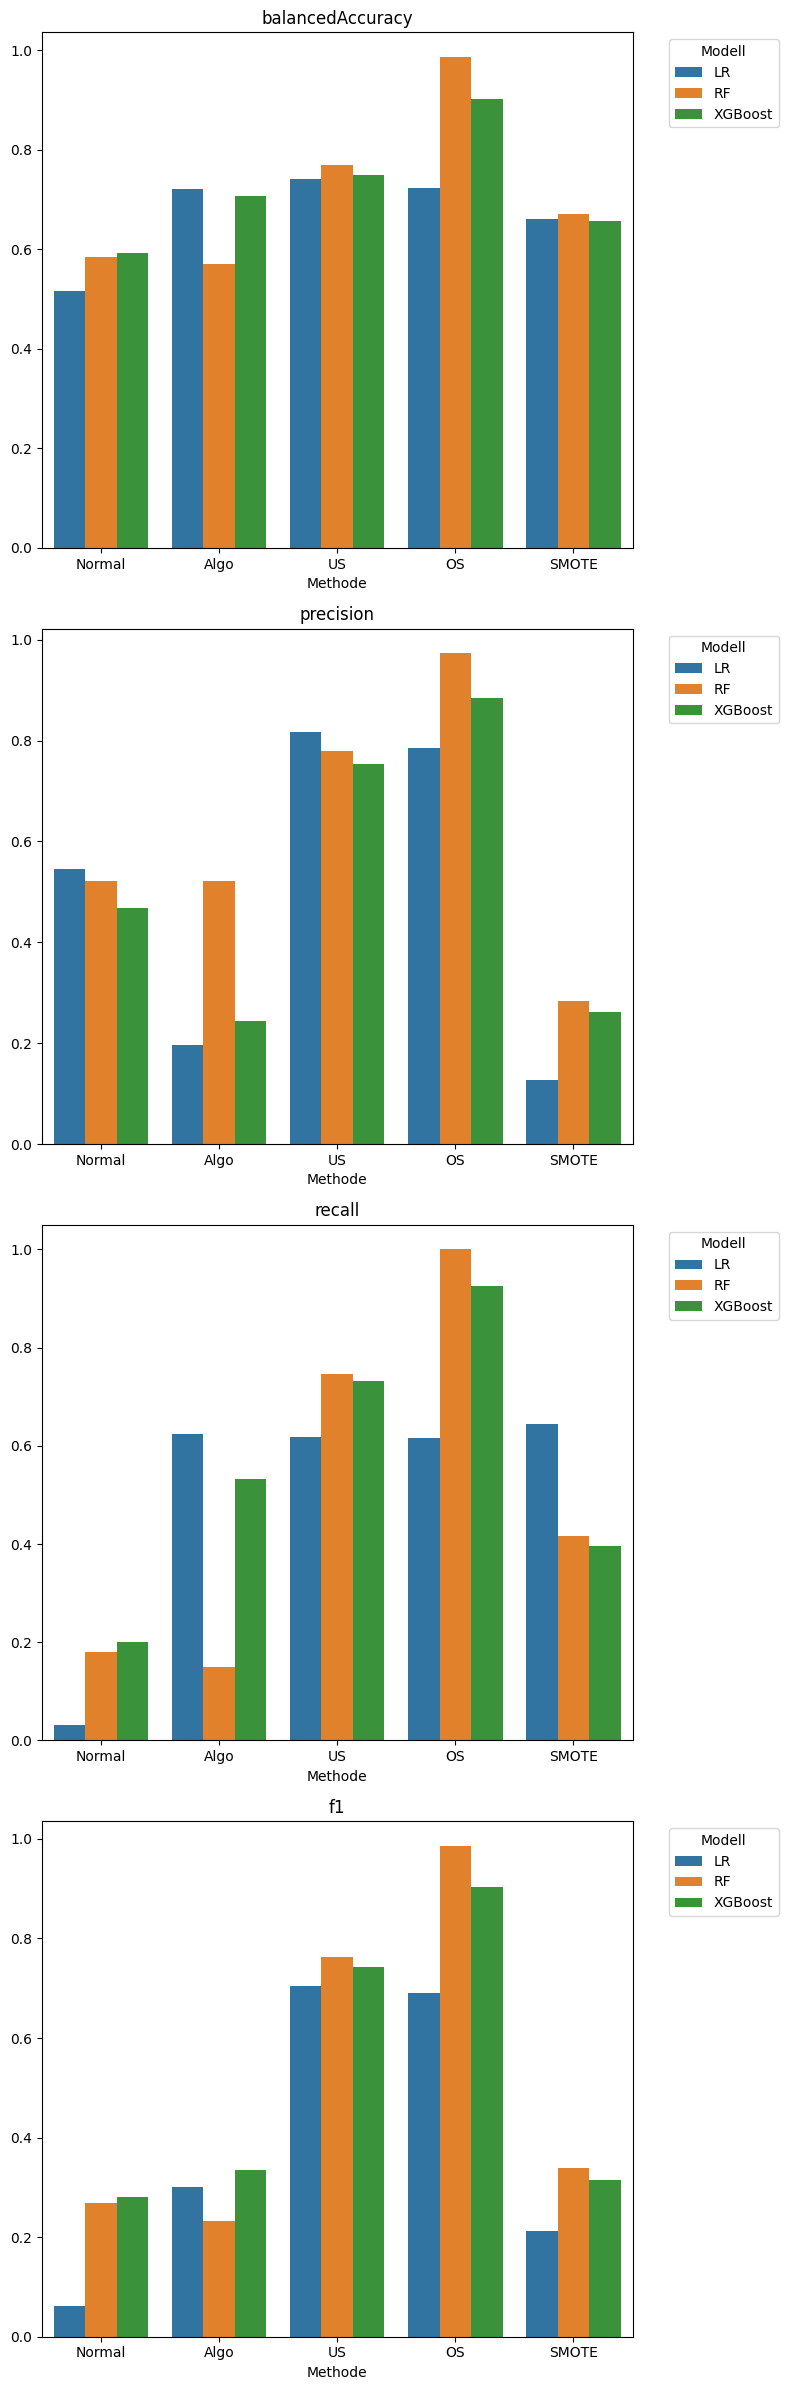

In [319]:
# Methoden-Liste
resampling_methods = ["Normal", "Algo", "US", "OS", "SMOTE"]

# Metriken-Liste 
metrics = ["balancedAccuracy", "precision", "recall", "f1"]

# Grafiken pro Metrik
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 6 * len(metrics)))
for ax, i in zip(axes, metrics):
    sns.barplot(data=df_result, x="method", y=i, hue="model", order=resampling_methods, ax=ax)
    ax.set_title(i)
    ax.set_xlabel("Methode")
    ax.set_ylabel('')
    ax.legend(title="Modell", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
# Gesamt-Grafik speichern
plt.savefig("graphics/evaluation_metrics.png", dpi=300, bbox_inches="tight")
plt.show()


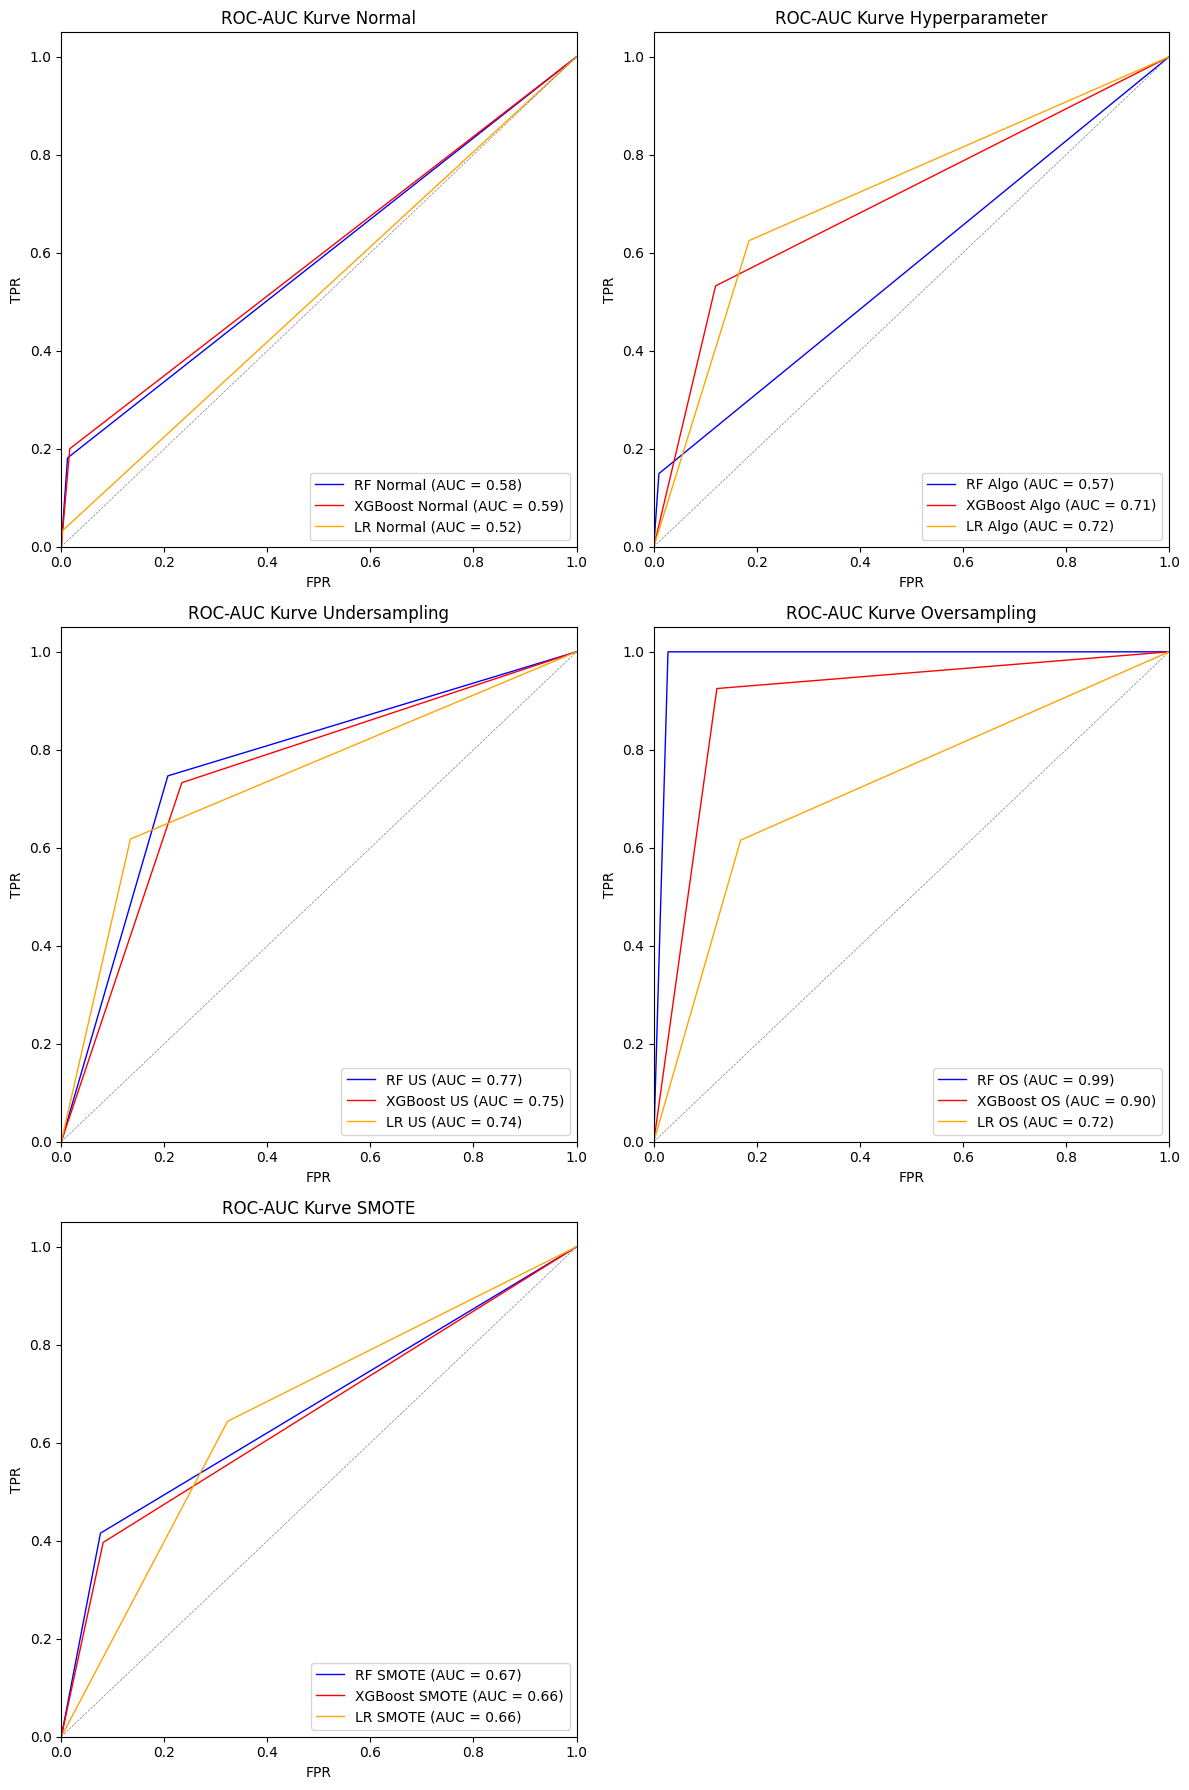

In [325]:
''' 
Funktion:       Erstellung ROC-AUC-Kurve für die verschiedenen Methoden zur Behebung unausgeglichener Daten
Input:          roc_data_list (roc_data)
                methodTitles (Methode zur Behebung unausgeglichener Daten für die Anzeige im Titel)
Funktionsweise: Basierend auf den gespeicherten ROC-Daten wird die ROC-AUC-Kurve für die drei ML-Modell pro Methode dargestellt.
'''
def plot_roc_curves(roc_data_list, methodTitles):
    num_plots = len(roc_data_list)
    num_cols = 2  
    num_rows = (num_plots + 1) // num_cols  
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
    axes = axes.flatten()  
    
    # Farben der einzelnen ML-Modelle festlegen
    colors = {
        'RF': 'blue',
        'XGBoost': 'red',
        'LR': 'orange'
    }
    
    # Pro Methode werden pro Modell die dazugehörige ROC-AUC-Kurve in die Grafik eingezeichnet
    for idx, (roc_data, methodTitles) in enumerate(zip(roc_data_list, methodTitles)):
        ax = axes[idx]
        
        for model_name, (fpr, tpr, auc) in roc_data.items():
            ax.plot(fpr, tpr, color=colors.get(model_name.split()[0], 'black'), lw=1,
                    label=f'{model_name} (AUC = {auc:.2f})')
        
        ax.plot([0, 1], [0, 1], color='gray', lw=0.5, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.set_title(f'ROC-AUC Kurve {methodTitles}')
        ax.legend(loc="lower right")
    
    if num_plots % 2 != 0:
        fig.delaxes(axes[-1])
    
    plt.tight_layout()
    # Gesamt-Grafik speichern
    plt.savefig('graphics/evaluation_roc_auc.png', dpi=300, bbox_inches="tight")
    plt.show()
    

roc_data_list = [roc_data, roc_data_algo, roc_data_us, roc_data_os, roc_data_smote] # Speicherung der einzelnen ROC-Daten in einer Liste
titles = ['Normal', 'Hyperparameter', 'Undersampling', 'Oversampling', 'SMOTE']
# ROC-Kurven-Plots
plot_roc_curves(roc_data_list, titles)

***
***